<a href="https://colab.research.google.com/github/jfaraudo/Numerical-Newton-examples/blob/master/harmonic/comparison_different_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NUMERICAL SOLUTIONS CLASSICAL HARMONIC OSCILLATOR**

As an example (and test) of numerical methods, we will discuss the case of the harmonic oscillator which has a well-known analytical solution.

**1. Euler Method**

This is the simplest method, but as we will see it has obvious problems

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Particle submitted to harmonic force
# mass
m = 1.0
# Period in ns
T = 1.0
#frequency
w = 2.0*np.pi/T
#Force constant
k=m*w*w

#Initial condition (position and velocity)
x0=0.1
v0=0.0
# initial Energy
E0=(m/2.0)*v0*v0+(k/2)*x0*x0

#Show data of the program

print('\n--------------------------------------------------------')
print('SIMPLE MD SIMULATION OF A SINGLE PARTICLE IN HARMONIC TRAP')
print('----------------------------------------------------------')
print('Force constant:',k,' N/m')
print('Particle of mass:',m,' ng')
print('Period according to analytical solution of harmonic oscillator:',T,' ns')

# input time step
dt = float(input("\n Time step dt (in ns):\n>"))
# Final time
ntot = int(input("\n Number of time steps:\n>"))
print('Simulation time will be',dt*ntot,' ns')

# create empty array starting at zero with time, position, velocity
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
t = np.zeros(ntot+1)

#Initial conditions
x[0] = x0
v[0] = v0

# Time evolution
print('\n Calculating time evolution...')
for i in range(0, ntot):

    #Calculate Force over the particle
    f = -k*x[i]
    #Calculate acceleration from 2nd Law
    a = f/m
    # New velocity after time dt
    v[i+1] = v[i]+a*dt
    #Average velocity from t to t+dt
    v_av= (v[i]+v[i+1])/2.0
    # New position
    x[i+1] = x[i]+v_av*dt
    #Update time
    t[i+1] = t[i]+dt
print("Calculation done!")



--------------------------------------------------------
SIMPLE MD SIMULATION OF A SINGLE PARTICLE IN HARMONIC TRAP
----------------------------------------------------------
Force constant: 39.47841760435743  N/m
Particle of mass: 1.0  ng
Period according to analytical solution of harmonic oscillator: 1.0  ns

 Time step dt (in ns):
>0.1

 Number of time steps:
>100
Simulation time will be 10.0  ns

 Calculating time evolution...
Calculation done!


Here is the result:


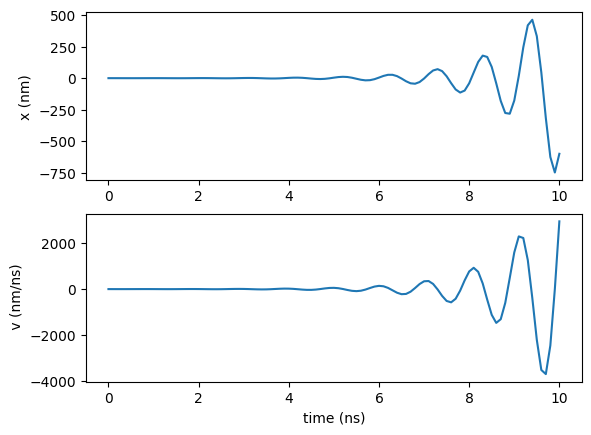

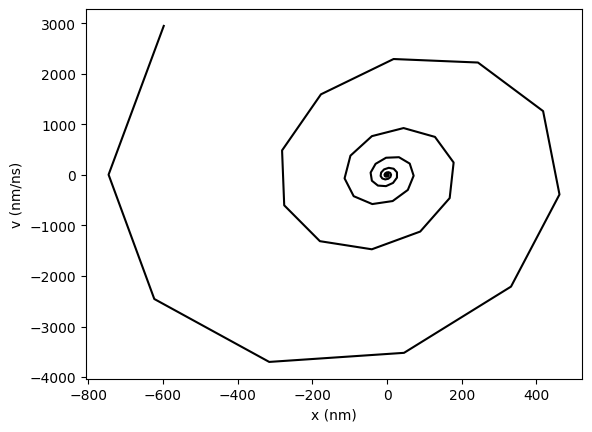

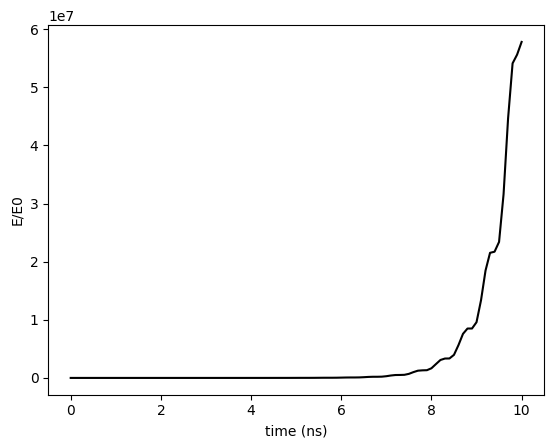

In [ ]:
plt.figure(1)

plt.subplot(211)
plt.plot(t,x)
plt.ylabel('x (nm)')

plt.subplot(212)
plt.plot(t,v)
plt.ylabel(' v (nm/ns)')
plt.xlabel('time (ns)')

#create axis
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
#Show plot in screen
plt.show()
#Show plot of phase space
plt.plot(x,v,'k')
plt.xlabel('x (nm)')
plt.ylabel('v (nm/ns)')
#Show plot in screen
plt.show()
#Also plot energy
#energy at all steps
E=(m/2.0)*v*v+(k/2)*x*x
#Relative value (E/E0)
RE=E/E0
plt.plot(t,RE,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
#Show plot in screen
plt.show()


**2. Velocity Verlet Method (half-kick version)**

There is a simple yet effective correction to Euler, simply considering a half-quick for the velocity which restores time reversal symmetry and Energy conservation


--------------------------------------------------------
SIMPLE MD SIMULATION OF A SINGLE PARTICLE IN HARMONIC TRAP
----------------------------------------------------------
Force constant: 39.47841760435743  N/m
Particle of mass: 1.0  ng
Period according to analytical solution of harmonic oscillator: 1.0  ns

 Time step dt (in ns):
>0.1

 Number of time steps:
>100
Simulation time will be 10.0  ns

 Calculating time evolution...
Calculation finished. Showing plot with results


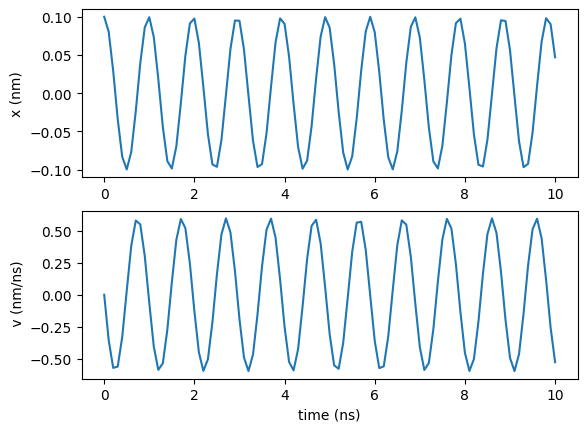

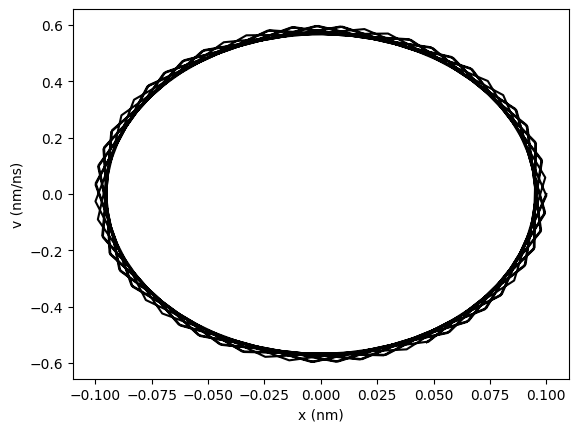

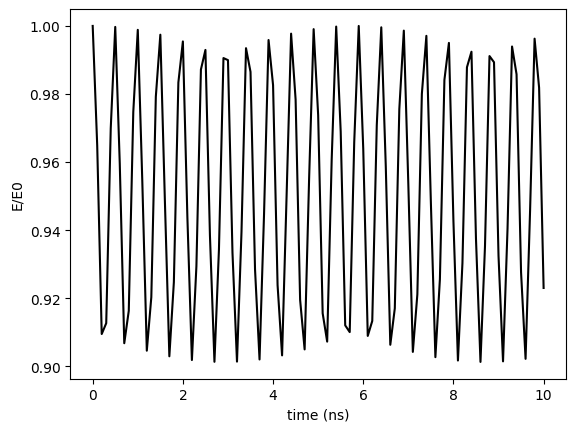

In [ ]:
# Particle submitted to harmonic force
# mass
m = 1.0
# Period in ns
T = 1.0
#frequency
w = 2.0*np.pi/T
#Force constant
k=m*w*w

#Initial condition (position and velocity)
x0=0.1
v0=0.0
# initial Energy
E0=(m/2.0)*v0*v0+(k/2)*x0*x0

#Show data of the program

print('\n--------------------------------------------------------')
print('SIMPLE MD SIMULATION OF A SINGLE PARTICLE IN HARMONIC TRAP')
print('----------------------------------------------------------')
print('Force constant:',k,' N/m')
print('Particle of mass:',m,' ng')
print('Period according to analytical solution of harmonic oscillator:',T,' ns')

# input time step
dt = float(input("\n Time step dt (in ns):\n>"))
# Final time
ntot = int(input("\n Number of time steps:\n>"))
print('Simulation time will be',dt*ntot,' ns')

# create empty array starting at zero with time, position, velocity
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
t = np.zeros(ntot+1)

#Initial conditions
x[0] = x0
v[0] = v0

# Time evolution
print('\n Calculating time evolution...')
for i in range(0, ntot):

    #Calculate Force over the particle
    f = -k*x[i]
    #Calculate acceleration from 2nd Law
    a = f/m
    # New velocity after time dt/2 (half kick)
    v_m = v[i]+a*dt/2.0
    # New position
    x[i+1] = x[i]+v_m*dt
    # Force at new position
    f=-k*x[i+1]
    # Acceleration
    a= f/m
    #Velocity from t+dt/2 to t+dt (remaining half kick)
    v[i+1]= v_m+a*dt/2.0
    #Update time
    t[i+1] = t[i]+dt

# plot output
print('Calculation finished. Showing plot with results')

#
# Create a plot with x(t) and v(t)
#
#plt.plot(t,x, 'ro', t, v, 'bv')
plt.figure(1)

plt.subplot(211)
plt.plot(t,x)
plt.ylabel('x (nm)')

plt.subplot(212)
plt.plot(t,v)
plt.ylabel(' v (nm/ns)')
plt.xlabel('time (ns)')

#create axis
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
#Show plot in screen
plt.show()
#Show plot of phase space
plt.plot(x,v,'k')
plt.xlabel('x (nm)')
plt.ylabel('v (nm/ns)')
#Show plot in screen
plt.show()
#Also plot energy
#energy at all steps
E=(m/2.0)*v*v+(k/2)*x*x
#Relative value (E/E0)
RE=E/E0
plt.plot(t,RE,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
#Show plot in screen
plt.show()

**3. Velocity Verlet**

The classical Velocity Verlet method, widely employed in Molecular Dynamics simulations, in a more convenient version.


--------------------------------------------------------
SIMPLE MD SIMULATION OF A SINGLE PARTICLE IN HARMONIC TRAP
----------------------------------------------------------
Force constant: 39.47841760435743  N/m
Particle of mass: 1.0  ng
Period according to analytical solution of harmonic oscillator: 1.0  ns

 Time step dt (in ns):
>0.1

 Number of time steps:
>100
Simulation time will be 10.0  ns

 Calculating time evolution...
Calculation finished. Showing plot with results


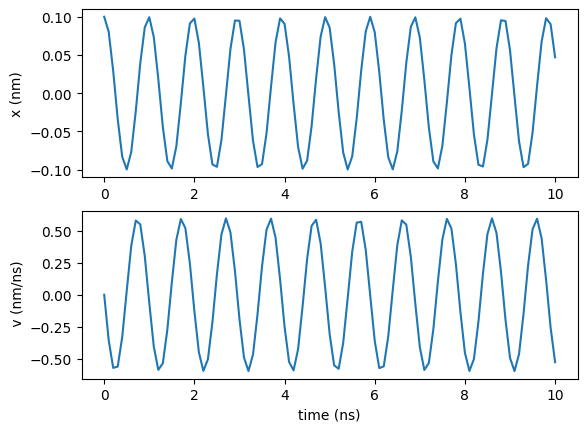

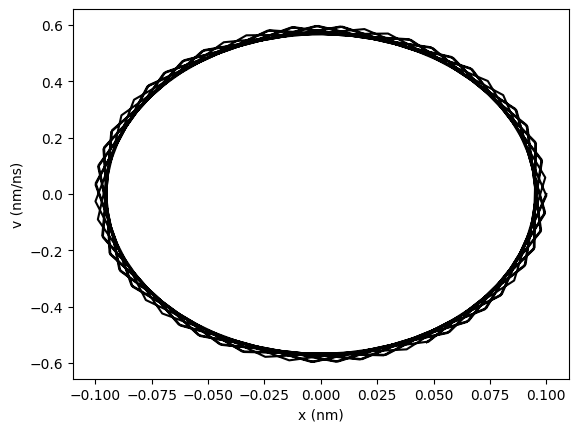

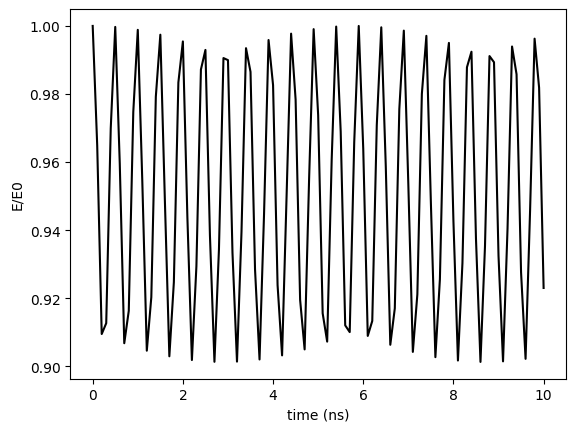

In [ ]:
# Particle submitted to harmonic force
# mass
m = 1.0
# Period in ns
T = 1.0
#frequency
w = 2.0*np.pi/T
#Force constant
k=m*w*w

#Initial condition (position and velocity)
x0=0.1
v0=0.0
# initial Energy
E0=(m/2.0)*v0*v0+(k/2)*x0*x0

#Show data of the program

print('\n--------------------------------------------------------')
print('SIMPLE MD SIMULATION OF A SINGLE PARTICLE IN HARMONIC TRAP')
print('----------------------------------------------------------')
print('Force constant:',k,' N/m')
print('Particle of mass:',m,' ng')
print('Period according to analytical solution of harmonic oscillator:',T,' ns')

# input time step
dt = float(input("\n Time step dt (in ns):\n>"))
# Final time
ntot = int(input("\n Number of time steps:\n>"))
print('Simulation time will be',dt*ntot,' ns')

# create empty array starting at zero with time, position, velocity, acc
t = np.zeros(ntot+1)
x = np.zeros(ntot+1)
v = np.zeros(ntot+1)
a = np.zeros(ntot+1)

#Initial conditions
x[0] = x0
v[0] = v0

#Force and acceleration at t=0
f = -k*x[0]
a[0] = f/m

# Time evolution
print('\n Calculating time evolution...')
for i in range(1, ntot+1):

    # Update time
    t[i] = t[i-1]+dt

    # New position
    x[i] = x[i-1]+v[i-1]*dt+(1.0/2.0)*a[i-1]*dt*dt

    # Calculate Force at new position
    f = -k*x[i]
    # Calculate acceleration from 2nd Law
    a[i] = f/m

    # Velocity at new position
    am=(a[i-1]+a[i])/2.0
    v[i]= v[i-1]+am*dt

    #Update time
    t[i] = t[i-1]+dt

# plot output
print('Calculation finished. Showing plot with results')

#
# Create a plot with x(t) and v(t)
#
#plt.plot(t,x, 'ro', t, v, 'bv')
plt.figure(1)

plt.subplot(211)
plt.plot(t,x)
plt.ylabel('x (nm)')

plt.subplot(212)
plt.plot(t,v)
plt.ylabel(' v (nm/ns)')
plt.xlabel('time (ns)')

#create axis
#plt.axhline(0, color='black')
#plt.axvline(0, color='black')
#Show plot in screen
plt.show()
#Show plot of phase space
plt.plot(x,v,'k')
plt.xlabel('x (nm)')
plt.ylabel('v (nm/ns)')
#Show plot in screen
plt.show()
#Also plot energy
#energy at all steps
E=(m/2.0)*v*v+(k/2)*x*x
#Relative value (E/E0)
RE=E/E0
plt.plot(t,RE,'k')
plt.xlabel('time (ns)')
plt.ylabel('E/E0')
#Show plot in screen
plt.show()
